In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep="|")
# this will check dtype of the data and also will check the column that
# # needed to be converted to from one data type to another
print(df.info())

/tmp/ipykernel_5589/431072879.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep="|")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [3]:
# Calculate descriptive statistics (mean, min, max, std, quartiles) for all numerical columns.
print(df.describe().T)

                              count          mean           std           min  \
UnderwrittenCoverID       1000098.0  1.048175e+05  6.329371e+04  1.000000e+00   
PolicyID                  1000098.0  7.956682e+03  5.290039e+03  1.400000e+01   
PostalCode                1000098.0  3.020601e+03  2.649854e+03  1.000000e+00   
mmcode                     999546.0  5.487770e+07  1.360381e+07  4.041200e+06   
RegistrationYear          1000098.0  2.010225e+03  3.261391e+00  1.987000e+03   
Cylinders                  999546.0  4.046642e+00  2.940201e-01  0.000000e+00   
cubiccapacity              999546.0  2.466743e+03  4.428006e+02  0.000000e+00   
kilowatts                  999546.0  9.720792e+01  1.939326e+01  0.000000e+00   
NumberOfDoors              999546.0  4.019250e+00  4.683144e-01  0.000000e+00   
CustomValueEstimate        220456.0  2.255311e+05  5.645157e+05  2.000000e+04   
NumberOfVehiclesInFleet         0.0           NaN           NaN           NaN   
SumInsured                10

In [4]:
# Calculate the percentage of missing values per column.
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
WrittenOff                  64.183810
Converted                   64.183810
Rebuilt                     64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
VehicleIntroDate             0.055195
NumberOfDoors                0.055195
bodytype                     0.055195
kilowatts                    0.055195
cubiccapacity                0.055195
Cylinders                    0.055195
Model                        0.055195
CapitalOutstanding           0.000200
dtype: float64


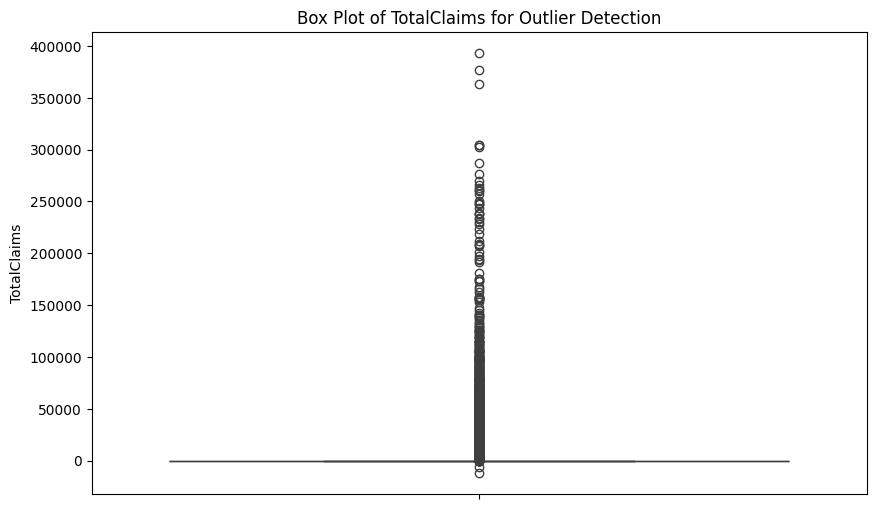

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TotalClaims'])
plt.title('Box Plot of TotalClaims for Outlier Detection')
plt.show()

Overall Portfolio Loss Ratio: 104.77%


/tmp/ipykernel_5589/3058927901.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  province_lr = df.groupby('Province').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum()).sort_values(ascending=False)



Loss Ratio by Province:
 Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
dtype: float64


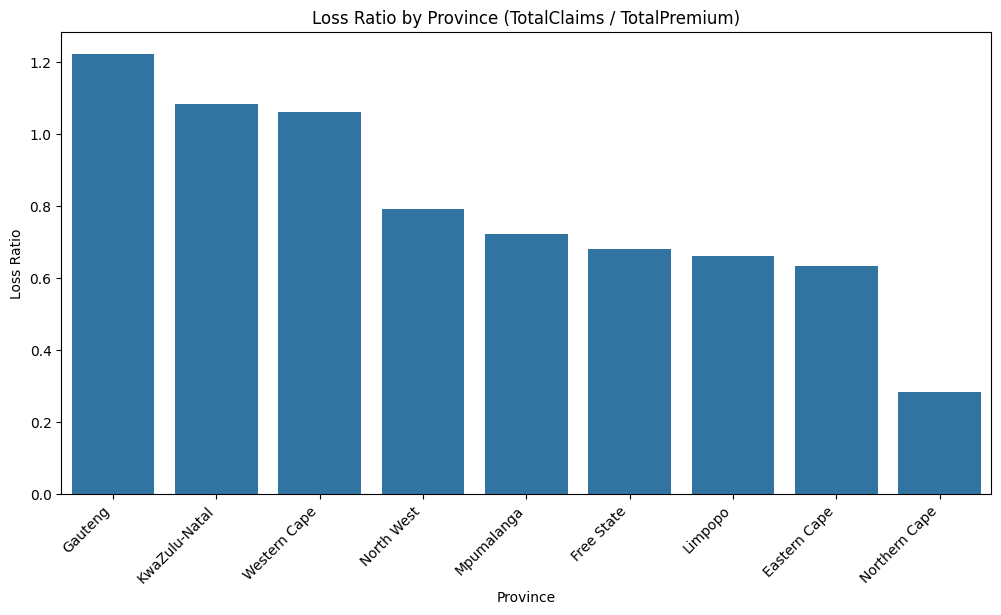

In [5]:
# Overall Loss Ratio
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Portfolio Loss Ratio: {overall_loss_ratio:.2%}")

# Loss Ratio by Province (Example)
province_lr = df.groupby('Province').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum()).sort_values(ascending=False)
print("\nLoss Ratio by Province:\n", province_lr)

plt.figure(figsize=(12, 6))
sns.barplot(x=province_lr.index, y=province_lr.values)
plt.xticks(rotation=45, ha='right')
plt.title('Loss Ratio by Province (TotalClaims / TotalPremium)')
plt.ylabel('Loss Ratio')
plt.show()

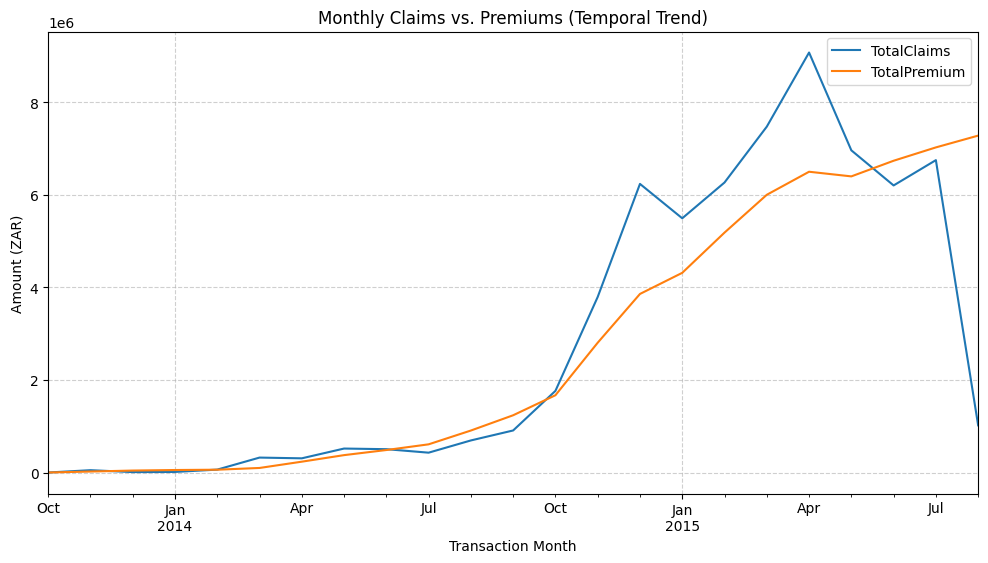


--- Summary of Monthly Data ---
                    TotalClaims  TotalPremium
TransactionPeriod                            
2013-10                0.000000    371.063512
2013-11            50585.078947  21307.467009
2013-12             9283.385965  42484.748888
2014-01            12436.859649  54085.196865
2014-02            62989.307018  60788.436470


In [8]:
try:
    df['TransactionPeriod'] = pd.to_datetime(df['TransactionMonth'], format='%Y%m').dt.to_period('M')
except ValueError:
    # If the format is already 'YYYY-MM' or 'YYYY-M', convert directly to period
    df['TransactionPeriod'] = df['TransactionMonth'].astype(str).str.strip().apply(lambda x: pd.Period(x, 'M'))

# 2. Group the data using the new period column
monthly_data = df.groupby('TransactionPeriod')[['TotalClaims', 'TotalPremium']].sum()

# 3. Plot the temporal trends
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='line', ax=plt.gca())
plt.title('Monthly Claims vs. Premiums (Temporal Trend)')
plt.xlabel('Transaction Month')
plt.ylabel('Amount (ZAR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Summary of Monthly Data ---")
print(monthly_data.head())